# 1. Authenticate to Twitter

In [6]:
# Import tweepy to work with the twitter API
import tweepy as tw

# Import numpy and pandas to work with dataframes
import numpy as np
import pandas as pd

# Import seaborn and matplotlib for viz
from matplotlib import pyplot as plt

In [7]:
consumer_key = '9bFjpKZLWGcFqFJCUi33T4bt3'
consumer_secret = 'E7fL3oliJ2bVafdGlcfxIpnvtHGT8dEQCZaeGiBbBGoPirZIYh'
access_token = '92316322-0gW5xASmNqjC1VhOej8x0rPjqdpHe0Hgthz26dosj'
access_token_secret = 'ocFSwpH7wvOTMTgDRdTybYX6aSH9qof128m1LoxVy46ka'

In [8]:
# Authenticate
auth = tw.OAuthHandler(consumer_key, consumer_secret)
# Set Tokens
auth.set_access_token(access_token, access_token_secret)
# Instantiate API
api = tw.API(auth, wait_on_rate_limit=True)

In [10]:
!pip uninstall tweepy

Found existing installation: tweepy 4.10.0
Uninstalling tweepy-4.10.0:
  Would remove:
    /Users/vinay/opt/anaconda3/lib/python3.8/site-packages/tweepy-4.10.0.dist-info/*
    /Users/vinay/opt/anaconda3/lib/python3.8/site-packages/tweepy/*
Proceed (Y/n)? ^C
ERROR: Operation cancelled by user


In [5]:
!pip install git+https://github.com/tweepy/tweepy.git

  Cloning https://github.com/tweepy/tweepy.git to /private/var/folders/c0/_vlzvy1575dg9fgv67kw89900000gn/T/pip-req-build-ircza_hn
  Running command git clone --filter=blob:none --quiet https://github.com/tweepy/tweepy.git /private/var/folders/c0/_vlzvy1575dg9fgv67kw89900000gn/T/pip-req-build-ircza_hn
  Resolved https://github.com/tweepy/tweepy.git to commit 598ea64d68ab3c27861e0f6dcf9bbce864dc3748
  Preparing metadata (setup.py) ... done
You should consider upgrading via the '/Users/vinay/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


# 2. Get Tweets

In [25]:
import os
import sys
import json
import time
import math
from tweepy import Cursor
import tweepy
from tweepy import OAuthHandler
import datetime
    

In [27]:
hashtag = "#presidentialdebate"
query = tw.Cursor(api.search_tweets, q=hashtag).items(1000)
tweets = [{'Tweet':tweet.text, 'Timestamp':tweet.created_at} for tweet in query]
print(tweets)

[{'Tweet': 'RT @wemimospot: No insults, point for point ONLY.\n\nCampaign for your candidate for #NigeriaDecides2023 \n\nWhy do you want Peter Obi?\n\nWhy is…', 'Timestamp': datetime.datetime(2022, 6, 13, 18, 47, 12, tzinfo=datetime.timezone.utc)}, {'Tweet': 'RT @WSjp_insight: 1st US #PresidentialDebate 09/29/2020 - hosted by cwru &amp; ClevelandClinic\n🇺🇸#Debates2020 #COVID19 \nhttps://t.co/65GKfg68lP…', 'Timestamp': datetime.datetime(2022, 6, 13, 13, 49, 43, tzinfo=datetime.timezone.utc)}, {'Tweet': "RT @WSjp_insight: 1st US #PresidentialDebate'16 excerpts.. https://t.co/IAxalj6Gxi @bencasselman @MelbInstUOM,@LaurenRosewarne,@Government_…", 'Timestamp': datetime.datetime(2022, 6, 13, 13, 49, 36, tzinfo=datetime.timezone.utc)}, {'Tweet': 'I so much anticipate the next Nig Presidential Debate, it will be flawless victory for Peter Obi and we will see ma… https://t.co/V405wfzNuH', 'Timestamp': datetime.datetime(2022, 6, 13, 12, 51, 35, tzinfo=datetime.timezone.utc)}, {'Tweet': 'No insul

In [28]:
df = pd.DataFrame.from_dict(tweets)
df.head()

,Tweet,Timestamp
0,"RT @wemimospot: No insults, point for point ON...",2022-06-13 18:47:12+00:00
1,RT @WSjp_insight: 1st US #PresidentialDebate 0...,2022-06-13 13:49:43+00:00
2,RT @WSjp_insight: 1st US #PresidentialDebate'1...,2022-06-13 13:49:36+00:00
3,I so much anticipate the next Nig Presidential...,2022-06-13 12:51:35+00:00
4,"No insults, point for point ONLY.\n\nCampaign ...",2022-06-13 11:55:51+00:00


In [29]:
trump_handle = ['DonaldTrump', 'Donald Trump', 'Donald', 'Trump', 'Trump\'s']
biden_handle = ['JoeBiden', 'Joe Biden', 'Joe', 'Biden', 'Biden\'s']

In [30]:
def identify_subject(tweet, refs):
    flag = 0 
    for ref in refs:
        if tweet.find(ref) != -1:
            flag = 1
    return flag

df['Trump'] = df['Tweet'].apply(lambda x: identify_subject(x, trump_handle)) 
df['Biden'] = df['Tweet'].apply(lambda x: identify_subject(x, biden_handle))
df.head(10)

,Tweet,Timestamp,Trump,Biden
0,"RT @wemimospot: No insults, point for point ON...",2022-06-13 18:47:12+00:00,0,0
1,RT @WSjp_insight: 1st US #PresidentialDebate 0...,2022-06-13 13:49:43+00:00,0,0
2,RT @WSjp_insight: 1st US #PresidentialDebate'1...,2022-06-13 13:49:36+00:00,0,0
3,I so much anticipate the next Nig Presidential...,2022-06-13 12:51:35+00:00,0,0
4,"No insults, point for point ONLY.\n\nCampaign ...",2022-06-13 11:55:51+00:00,0,0
5,"RT @wemimospot: No insults, point for point ON...",2022-06-13 09:36:29+00:00,0,0
6,"RT @wemimospot: No insults, point for point ON...",2022-06-13 09:14:49+00:00,0,0
7,"RT @wemimospot: No insults, point for point ON...",2022-06-13 07:12:41+00:00,0,0
8,What the next #PresidentialDebate should talk ...,2022-06-13 04:08:43+00:00,0,0
9,"RT @wemimospot: No insults, point for point ON...",2022-06-12 21:56:45+00:00,0,0


# 3. Preprocess

In [32]:
!pip install textblob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 KB 9.6 MB/s eta 0:00:0000:01
You should consider upgrading via the '/Users/vinay/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [33]:
# Import stopwords
import nltk
from nltk.corpus import stopwords

# Import textblob
from textblob import Word, TextBlob

In [34]:
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = stopwords.words('english')
custom_stopwords = ['RT', '#PresidentialDebate']

[nltk_data] Downloading package stopwords to /Users/vinay/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/vinay/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [35]:
def preprocess_tweets(tweet, custom_stopwords):
    processed_tweet = tweet
    processed_tweet.replace('[^\w\s]', '')
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in stop_words)
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in custom_stopwords)
    processed_tweet = " ".join(Word(word).lemmatize() for word in processed_tweet.split())
    return(processed_tweet)

df['Processed Tweet'] = df['Tweet'].apply(lambda x: preprocess_tweets(x, custom_stopwords))
df.head()

,Tweet,Timestamp,Trump,Biden,Processed Tweet
0,"RT @wemimospot: No insults, point for point ON...",2022-06-13 18:47:12+00:00,0,0,"@wemimospot: No insults, point point ONLY. Cam..."
1,RT @WSjp_insight: 1st US #PresidentialDebate 0...,2022-06-13 13:49:43+00:00,0,0,@WSjp_insight: 1st US 09/29/2020 - hosted cwru...
2,RT @WSjp_insight: 1st US #PresidentialDebate'1...,2022-06-13 13:49:36+00:00,0,0,@WSjp_insight: 1st US #PresidentialDebate'16 e...
3,I so much anticipate the next Nig Presidential...,2022-06-13 12:51:35+00:00,0,0,I much anticipate next Nig Presidential Debate...
4,"No insults, point for point ONLY.\n\nCampaign ...",2022-06-13 11:55:51+00:00,0,0,"No insults, point point ONLY. Campaign candida..."


In [36]:
print('Base review\n', df['Tweet'][0])
print('\n------------------------------------\n')
print('Cleaned and lemmatized review\n', df['Processed Tweet'][0])

Base review
 RT @wemimospot: No insults, point for point ONLY.

Campaign for your candidate for #NigeriaDecides2023 

Why do you want Peter Obi?

Why is…

------------------------------------

Cleaned and lemmatized review
 @wemimospot: No insults, point point ONLY. Campaign candidate #NigeriaDecides2023 Why want Peter Obi? Why is…


# 4. Calculate Sentiment

In [37]:
# Calculate polarity
df['polarity'] = df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[0])
df['subjectivity'] = df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[1])
df[['Processed Tweet', 'Biden', 'Trump', 'polarity', 'subjectivity']].head()

,Processed Tweet,Biden,Trump,polarity,subjectivity
0,"@wemimospot: No insults, point point ONLY. Cam...",0,0,0.0,1.0
1,@WSjp_insight: 1st US 09/29/2020 - hosted cwru...,0,0,0.0,0.0
2,@WSjp_insight: 1st US #PresidentialDebate'16 e...,0,0,0.0,0.0
3,I much anticipate next Nig Presidential Debate...,0,0,0.4,0.4
4,"No insults, point point ONLY. Campaign candida...",0,0,0.0,1.0


In [38]:
display(df[df['Trump']==1][['Trump','polarity','subjectivity']].groupby('Trump').agg([np.mean, np.max, np.min, np.median]))
df[df['Biden']==1][['Biden','polarity','subjectivity']].groupby('Biden').agg([np.mean, np.max, np.min, np.median])

polarity                  subjectivity                 
          mean amax amin median         mean amax amin median
Trump                                                        
1          0.0  0.0  0.0    0.0          0.0  0.0  0.0    0.0

polarity                       subjectivity                      
           mean      amax amin median         mean      amax amin median
Biden                                                                   
1      0.151429  0.378571  0.0    0.0     0.224762  0.561905  0.0    0.0

## 5. Visualise

In [39]:
biden = df[df['Biden']==1][['Timestamp', 'polarity']]
biden = biden.sort_values(by='Timestamp', ascending=True)
biden['MA Polarity'] = biden.polarity.rolling(10, min_periods=3).mean()

trump = df[df['Trump']==1][['Timestamp', 'polarity']]
trump = trump.sort_values(by='Timestamp', ascending=True)
trump['MA Polarity'] = trump.polarity.rolling(10, min_periods=3).mean()

In [40]:
trump.head()

,Timestamp,polarity,MA Polarity
73,2022-06-05 13:47:06+00:00,0.0,NaN
70,2022-06-05 19:32:16+00:00,0.0,NaN
53,2022-06-08 14:48:06+00:00,0.0,0.0
44,2022-06-09 14:36:35+00:00,0.0,0.0
39,2022-06-10 02:45:00+00:00,0.0,0.0


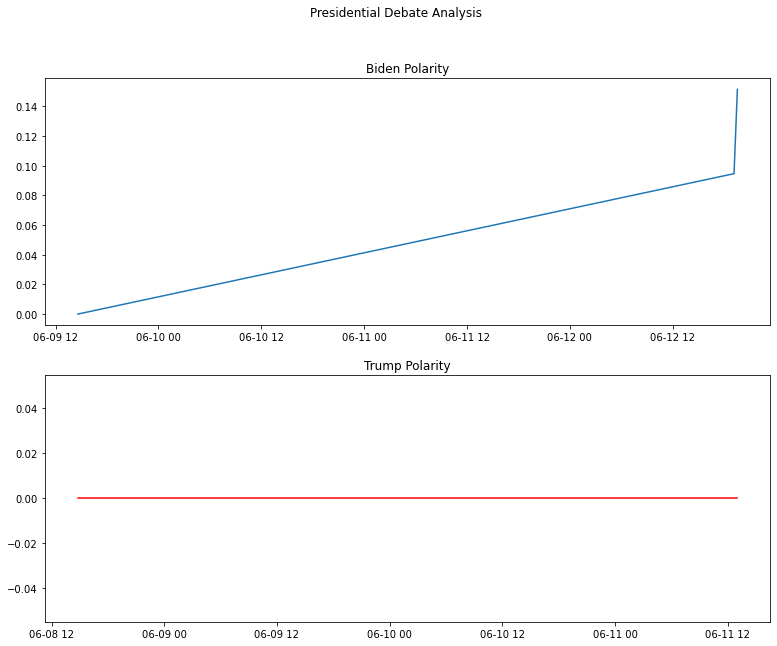

In [41]:
repub = 'red'
demo = 'blue'
fig, axes = plt.subplots(2, 1, figsize=(13, 10))

axes[0].plot(biden['Timestamp'], biden['MA Polarity'])
axes[0].set_title("\n".join(["Biden Polarity"]))
axes[1].plot(trump['Timestamp'], trump['MA Polarity'], color='red')
axes[1].set_title("\n".join(["Trump Polarity"]))

fig.suptitle("\n".join(["Presidential Debate Analysis"]), y=0.98)

plt.show()